In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [22]:
#Load Iris Data
iris = load_iris() # load the iris dataset
#X=iris.data
#y=iris.target
#Create Pandas-dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [23]:
#Selecting two classes of IRIS DataSet
iris_new = iris_df.drop(iris_df[iris_df.target == 2].index)
#Save New dataset
iris_new.to_csv('iris_new.csv')
iris_new.shape

(100, 5)

In [24]:
#Load New Dataset
url="https://raw.githubusercontent.com/anu1meha/Iris-Dataset-Analysis-LogocReg-LDA-QDA-/master/iris_new.csv"

#print(iris_new.shape)

data = pd.read_csv(url ,error_bad_lines=False)
data.shape
#new x,y dataframe
X= data.iloc[:,1:5].values
y= data.iloc[:,5].values

print(y)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [25]:
#split data in train and validation set
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,)
print(y_val)

[1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


In [26]:
#Logistic Regression
model1 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
model1.fit(X_train, y_train)
output = model1.predict(X_val)


#LDA
model2 = LinearDiscriminantAnalysis()
model2.fit(X_train, y_train)
output = model2.predict(X_val)

#QDA
model3 = QuadraticDiscriminantAnalysis()
model3.fit(X_train, y_train)
output = model3.predict(X_val)


In [27]:
# Summary of the Evaluation made by the models

In [28]:
#Logistic Regression 
model1.intercept_, model1.coef_

(array([-0.00280112]),
 array([[ 0.00299109, -0.02104326,  0.04540159,  0.01853068]]))

In [29]:
#LDA Evalutation
model2.intercept_
print(model2.priors_)
print(model2.means_)
print(model2.coef_)

[0.5125 0.4875]
[[5.02195122 3.42682927 1.45609756 0.25121951]
 [5.98461538 2.78461538 4.24102564 1.33333333]]
[[ -5.21846245 -14.59808457  21.76361213  28.35310866]]


In [30]:
#QDA Evaluation
print(model3.priors_)
print(model3.means_)

[0.5125 0.4875]
[[5.02195122 3.42682927 1.45609756 0.25121951]
 [5.98461538 2.78461538 4.24102564 1.33333333]]


In [31]:
#Summary of the predictions made by the models-

In [32]:
#Logistic Regression Prediction
pred1=model1.predict(X_val)
print(np.unique(pred1, return_counts=True))
print(confusion_matrix(pred1, y_val))
print(classification_report(y_val, pred1, digits=3))
print('accuracy is',accuracy_score(pred1,y_val))

(array([1.]), array([20], dtype=int64))
[[ 0  0]
 [ 9 11]]
             precision    recall  f1-score   support

        0.0      0.000     0.000     0.000         9
        1.0      0.550     1.000     0.710        11

avg / total      0.303     0.550     0.390        20

('accuracy is', 0.55)


In [33]:
#LDA Prediction
pred2=model2.predict(X_val)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_val))
print(classification_report(y_val, pred2, digits=3))
print('accuracy is',accuracy_score(pred2,y_val))

(array([0., 1.]), array([ 9, 11], dtype=int64))
[[ 9  0]
 [ 0 11]]
             precision    recall  f1-score   support

        0.0      1.000     1.000     1.000         9
        1.0      1.000     1.000     1.000        11

avg / total      1.000     1.000     1.000        20

('accuracy is', 1.0)


In [34]:
#QDA Prediction
from sklearn.metrics import confusion_matrix, classification_report, precision_score
pred3=model3.predict(X_val)
print(np.unique(pred3, return_counts=True))
print(confusion_matrix(pred3, y_val))
print(classification_report(y_val, pred3, digits=3))
print('accuracy is',accuracy_score(pred3,y_val))

(array([0., 1.]), array([ 9, 11], dtype=int64))
[[ 9  0]
 [ 0 11]]
             precision    recall  f1-score   support

        0.0      1.000     1.000     1.000         9
        1.0      1.000     1.000     1.000        11

avg / total      1.000     1.000     1.000        20

('accuracy is', 1.0)


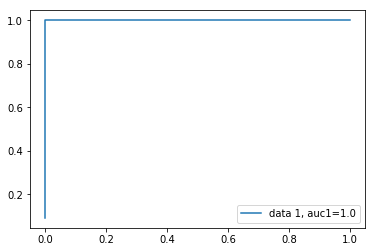

In [35]:
#ROC Curve for model1-Logistic Regression:
from sklearn import metrics
pred1_proba = model1.predict_proba(X_val)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_val,  pred1_proba)
auc1 = metrics.roc_auc_score(y_val, pred1_proba)
pyplot.plot(fpr1,tpr1,label="data 1, auc1="+str(auc1))
pyplot.legend(loc=4)
pyplot.show()

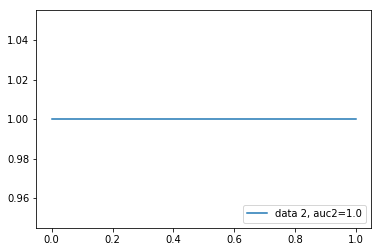

In [36]:
#ROC Curve for model2-LDA:
from sklearn import metrics
pred2_proba = model2.predict_proba(X_val)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_val,  pred2_proba)
auc2 = metrics.roc_auc_score(y_val, pred2_proba)
pyplot.plot(fpr2,tpr2,label="data 2, auc2="+str(auc2))
pyplot.legend(loc=4)
pyplot.show()

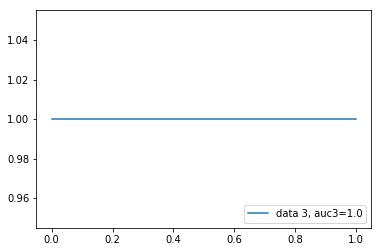

In [37]:
#ROC Curve for model2-LDA:
from sklearn import metrics
pred3_proba = model3.predict_proba(X_val)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_val,  pred3_proba)
auc3 = metrics.roc_auc_score(y_val, pred3_proba)
pyplot.plot(fpr3,tpr3,label="data 3, auc3="+str(auc3))
pyplot.legend(loc=4)
pyplot.show()

In [38]:
#Comparision among all models:

In [39]:
all_clf = [model1, model2, model3]
print('10-fold cross validation:\n')
clf_labels = [
    'Logistic Regression',
    'LDA',
    'QDA',
    ]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(
    estimator=clf,
    X=X_train,
    y=y_train,
    cv=10,
    scoring='roc_auc',
    )
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



10-fold cross validation:

ROC AUC: 1.00 (+/- 0.00) [Logistic Regression]
ROC AUC: 1.00 (+/- 0.00) [LDA]
ROC AUC: 1.00 (+/- 0.00) [QDA]


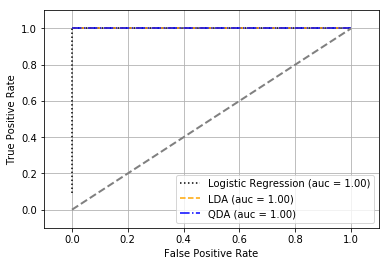

In [40]:
from sklearn.metrics import roc_curve, auc
colors = ['black', 'orange', 'blue', 'green','pink']
linestyles = [':', '--', '-.', '-','-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    pyplot.plot(
    fpr,
    tpr,
    color=clr,
    linestyle=ls,
    label='%s (auc = %0.2f)' % (label, roc_auc)
    )
pyplot.legend(loc='lower right')
pyplot.plot(
[0, 1],
[0, 1],
linestyle='--',
color='gray',
linewidth=2,
)
pyplot.xlim([-0.1, 1.1])
pyplot.ylim([-0.1, 1.1])
pyplot.grid()
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()